In [1]:
# 로지스틱 회귀(Logistic Models)
# 이름은 회귀라는 단어가 들어가지만, 가능한 클래가 2개인 이진 분류를 위한 모델
# 로지스틱 회귀 모델은 선형 회귀 모델에서 시그모이드 함수를 적용
# 로지스틱 회귀의 학습 목표는 목적 함수를 최소화하는 파라미터 w를 찾는 것
# 2진 분류 뿐만 아니라 다항 분류 확장 가능

In [2]:
# 간단한 예제

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.style.use(['seaborn-whitegrid'])

In [7]:
from sklearn.datasets import make_classification 
# 데이터를 직접 만들기 위해서
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀도 선형 회귀에 포함되어 있음

In [15]:
# 데이터 셋 만들기
samples =1000 
# n_redundant=0 노이즈에 해당함
# n_informative 독립 변수중 종속 변수와 상관 관계가 있는 성분의 수
# n_clusters_per_class 클러스터 당 클래스 개수
X,y = make_classification(n_samples=samples, n_features=2, 
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=1)

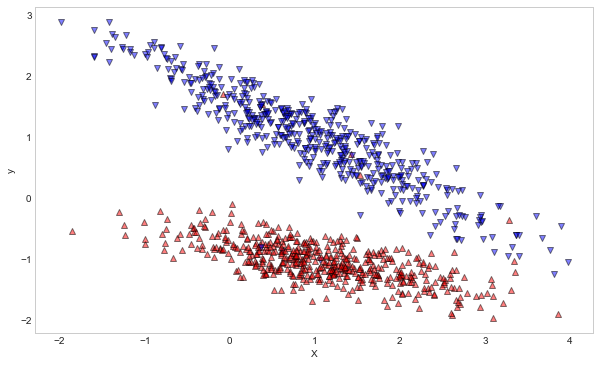

In [17]:
# 데이터 시각화
fig, ax = plt.subplots(1,1, figsize=(10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i,0], X[i,1], edgecolors = 'k', alpha=0.5, marker= '^', color = 'r')
    else:
        ax.scatter(X[i,0], X[i,1], edgecolors = 'k', alpha=0.5, marker= 'v', color = 'b')

plt.show()

In [19]:
# 모델 적용

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [20]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))
# 로지스틱 회귀는 잘 분류를 하는 편임.

학습 데이터 점수: 0.99375
평가 데이터 점수: 0.975


In [28]:
# 점수를 제대로 보기 위해서 교차 검증을 해보자
scores = cross_val_score(model, X, y, scoring='accuracy',cv=10)
print("CV 평균 점수:{}".format(scores.mean()))

CV 평균 점수:0.99


In [36]:
model.intercept_, model.coef_

(array([-2.23699528]), array([[2.23047348, 4.8420955 ]]))

In [44]:
len(X[:,1])

1000

<ipython-input-45-e235f44a0241>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


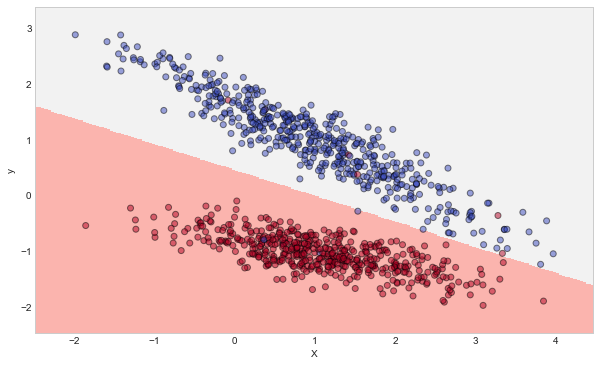

In [45]:
# 시각화
x_min, x_max = X[:,0].min() -.5, X[:,0].max() +.5
y_min, y_max = X[:,1].min() -.5, X[:,1].max() +.5

xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.02),
                     np.arange(y_min,y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:,0], X[:,1], c=np.abs(y - 1), edgecolors='k', alpha = 0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max()) 
plt.yticks()
plt.xticks()

plt.show()

In [46]:
# 붓꽃 데이터 활용하기

In [ ]:
from sklearn.datasets import 